In [7]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns

%matplotlib inline

In [8]:
def learning_algorithm_pearsons_r(x, y, data):
    
    # Reindex the data frame, add 2 new columns: z-score of x & y
    col_names = list(data.columns)
    col_names.append('z_x')
    col_names.append('z_y')
    data = data.reindex(columns=col_names)
    
    # Compute the mean and std of x
    m_x = data.mean()[x]
    sd_x = data.std()[x]

    # Compute the mean and std of y
    m_y = data.mean()[y]
    sd_y = data.std()[y]
    
    # Compute the Z-Score for columns z_x and z_y
    y_list = list(data[y])
    for i in range(0, len(y_list)):
        y_list[i] = (y_list[i]-m_y)/sd_y
    data['z_y'] = y_list

    x_list = list(data[x])
    for i in range(0, len(x_list)):
        x_list[i] = (x_list[i]-m_x)/sd_x
    data['z_x'] = x_list
    
    # Compute pearson's r
    r = 0
    for row in data.itertuples():
        r = r + row[3]*row[4]
    r = r/(len(data)-1)
    
    # Compute intercepts and regression coefficients
    b = r*(sd_y/sd_x)
    a = m_y - (b*m_x)
    def hypothesis(n):
        return a+(b*n)
    print("h(x)=",a,"+",b,"x")
    
    return hypothesis

In [9]:
# Open input data
training_data = DataFrame.from_csv('train2.csv', index_col=None)

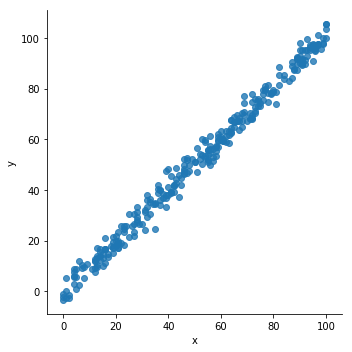

In [10]:
# Plot the training set
plot = sns.lmplot(x="x", y="y",data=training_data, fit_reg=False)

In [11]:
# Get hypothesis from training data
hypothesis_func = learning_algorithm_pearsons_r(x='x',y='y', data=training_data)

h(x)= -0.461810773661 + 1.01433535512 x


In [12]:
# Run the hypothesis function on the test set
test_data = DataFrame.from_csv('test2.csv', index_col=None)
col_names = list(test_data.columns)
col_names.append('y_estimated')
test_data = test_data.reindex(columns=col_names)
estimated_list = list(test_data['x'])
for i in range(0, len(estimated_list)):
    estimated_list[i] = hypothesis_func(estimated_list[i])
test_data['y_estimated'] = estimated_list
print(test_data)

       x           y  y_estimated
0     24   21.549452    23.882238
1     50   47.464463    50.254957
2     15   17.218656    14.753220
3     38   36.586398    38.082933
4     87   87.288984    87.785365
5     36   32.463875    36.054262
6     12   10.780897    11.710213
7     81   80.763399    81.699353
8     25   24.612151    24.896573
9      5    6.963319     4.609866
10    16   11.237573    15.767555
11    16   13.532902    15.767555
12    24   24.603239    23.882238
13    39   39.400500    39.097268
14    54   48.437538    54.312298
15    60   61.699003    60.398311
16    26   26.928324    25.910908
17    73   70.405206    73.584670
18    29   29.340924    28.953915
19    31   25.308952    30.982585
20    68   69.029343    68.512993
21    87   84.994847    87.785365
22    58   57.043103    58.369640
23    54   50.592199    54.312298
24    84   83.027722    84.742359
25    58   57.057527    58.369640
26    49   47.958833    49.240622
27    20   24.342264    19.824896
28    90   94.

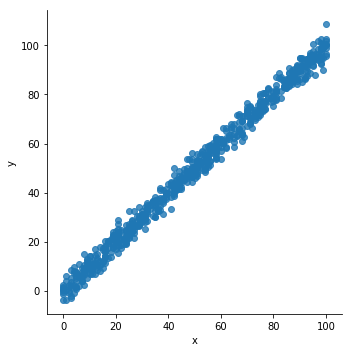

In [13]:
# Plot test set
plot = sns.lmplot(x="x", y="y",data=test_data, fit_reg=False)

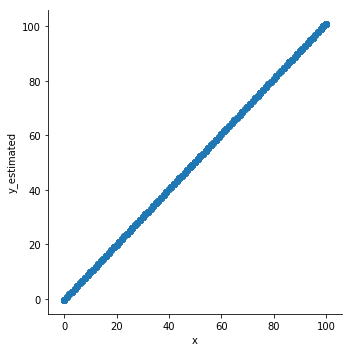

In [14]:
plot = sns.lmplot(x="x", y="y_estimated",data=test_data, fit_reg=False)